# <div align="center">Unsupervised Learning</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

 <a id="top"></a> <br>
## Notebook  Content

- [Various Data Generation](#Data)
- [K-Means Clustering](#KMeans)
- [Mini Batch K-Means](#MiniBatchKMeans)
- [Hierarchical Clustering](#Hierarchical)
- [DBSCAN](#DBSCAN)
- [Local Outlier Factor](#LocalOutlierFactor)

In [18]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# plt.style.use('seaborn-white')

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import scale, \
                                  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, \
                            MiniBatchKMeans, \
                            AgglomerativeClustering, \
                            DBSCAN
#                             OPTICS

from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn import datasets
# from sklearn.datasets import make_blobs

import time

<a id="Data"></a> <br>

# <div align="center">Generate Data</div>
---------------------------------------------------------------------
[go to top](#top)

In [2]:
n_samples = 1500
random_state = 22
plt.figure(figsize = (15,25))

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

In [3]:
def plot_scatter_c(x, y):
    plt.figure(figsize = (10,5))
    plt.scatter(x[:,0],x[:,1], c = y)
    plt.show()

In [4]:
def plot_scatter(x):
    plt.figure(figsize = (10,5))
    plt.scatter(x[:,0],x[:,1])
    plt.show()

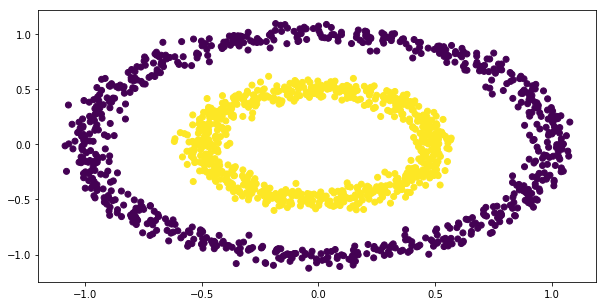

In [5]:
noisy_circles, y_noisy_circles = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = .05)
plot_scatter_c(noisy_circles, y_noisy_circles)

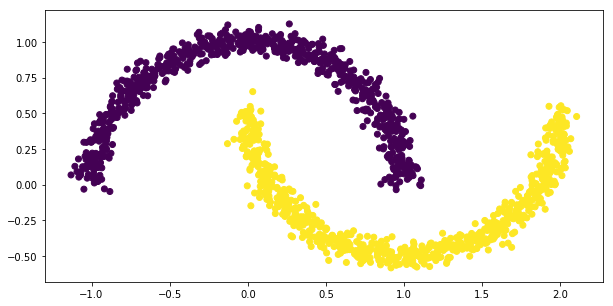

In [6]:
noisy_moons, y_noisy_moons = datasets.make_moons(n_samples = n_samples, noise = .05)
plot_scatter_c(noisy_moons, y_noisy_moons)

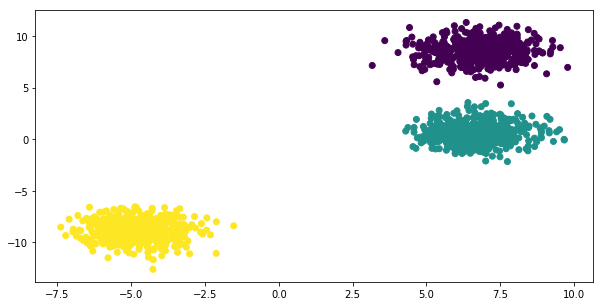

In [7]:
blobs, y_blobs = datasets.make_blobs(n_samples = n_samples, random_state = 8, center_box = (-9,9))
plot_scatter_c(blobs, y_blobs)

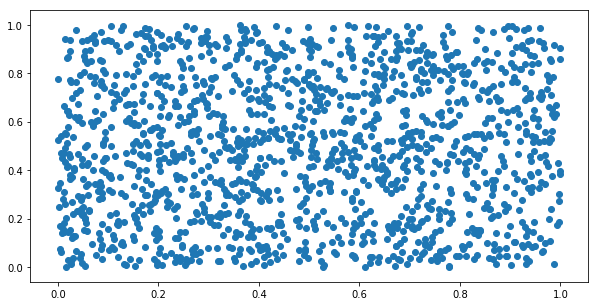

In [8]:
no_structure = np.random.rand(n_samples, 2)
plot_scatter(no_structure)

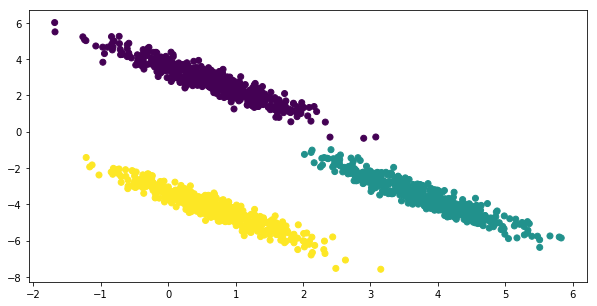

In [9]:
transformation = [[0.6, -0.6], [-0.4, 0.8]]
blobs_aniso = np.dot(blobs, transformation)

plot_scatter_c(blobs_aniso, y_blobs)

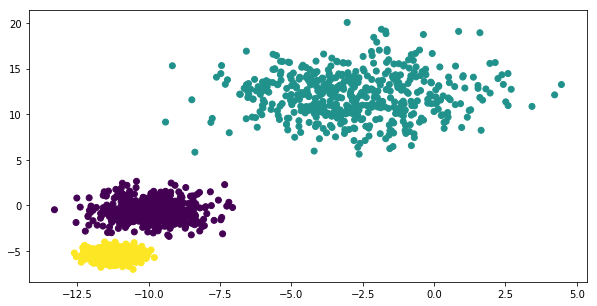

In [10]:
blobs_varied,y_blobs_varied = datasets.make_blobs(n_samples=n_samples, 
                                        cluster_std = [1.0, 2.5, 0.5], 
                                        random_state = random_state,
                                        center_box = (-17,17))
plot_scatter_c(blobs_varied, y_blobs_varied)

<a id="KMeans"></a> <br>

# <div align="center">K-Means</div>
---------------------------------------------------------------------
[go to top](#top)

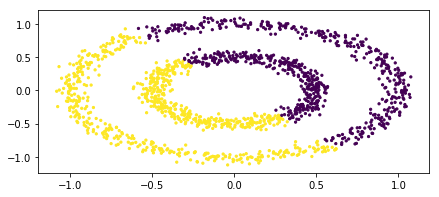

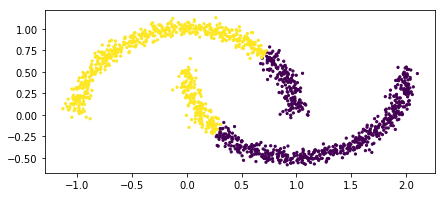

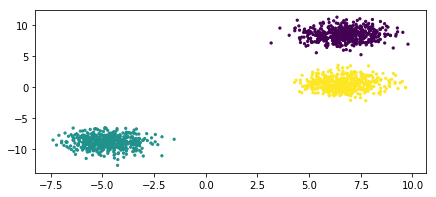

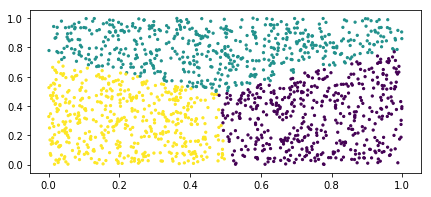

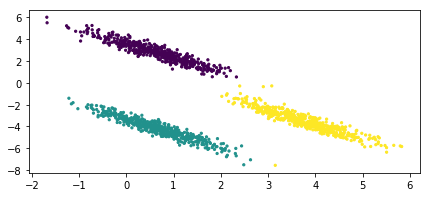

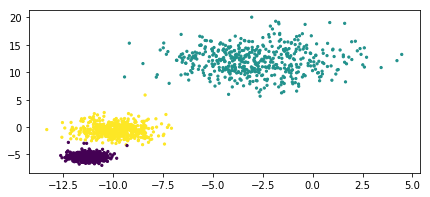

In [11]:
data = [noisy_circles, noisy_moons, blobs, no_structure,blobs_aniso, blobs_varied]

for j in enumerate(data):
    if np.logical_or([j[0] == 0],[j[0] == 1]):
        mod_KMeans = KMeans(n_clusters = 2)
        mod_KMeans.fit(j[1])
        plt.figure(figsize = (7,3))
        plt.scatter(j[1][:,0], j[1][:,1], c = mod_KMeans.labels_, s = 5)
        plt.show()
    else: 
        mod_KMeans = KMeans(n_clusters = 3)
        mod_KMeans.fit(j[1])
        plt.figure(figsize = (7,3))
        plt.scatter(j[1][:,0], j[1][:,1], c = mod_KMeans.labels_, s = 5)
        plt.show()


<a id="MiniBatchKMeans"></a> <br>

# <div align="center">Mini Batch K-Means</div>
---------------------------------------------------------------------
[go to top](#top)

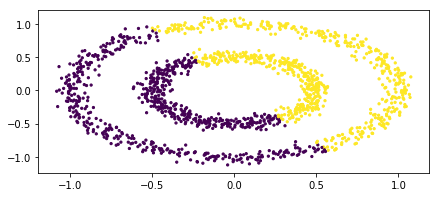

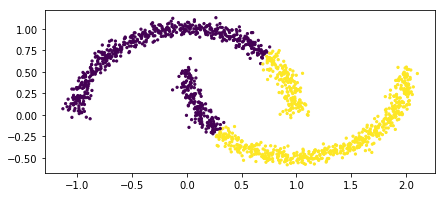

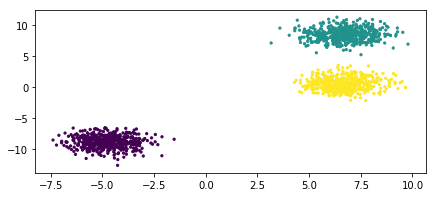

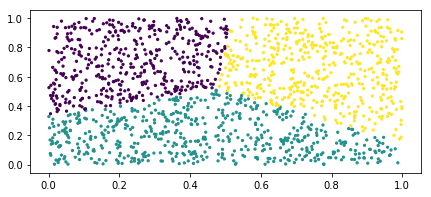

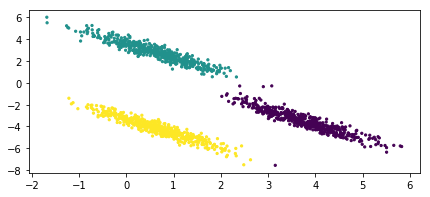

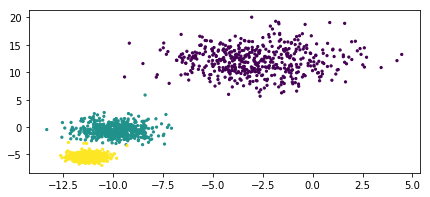

In [12]:
for j in enumerate(data):
    if np.logical_or([j[0] == 0],[j[0] == 1]):
        mod_KMeans = MiniBatchKMeans(n_clusters = 2)
        mod_KMeans.fit(j[1])
        plt.figure(figsize = (7,3))
        plt.scatter(j[1][:,0], j[1][:,1], c = mod_KMeans.labels_, s = 5)
        plt.show()
    else: 
        mod_KMeans = MiniBatchKMeans(n_clusters = 3)
        mod_KMeans.fit(j[1])
        plt.figure(figsize = (7,3))
        plt.scatter(j[1][:,0], j[1][:,1], c = mod_KMeans.labels_, s = 5)
        plt.show()


<a id="Hierarchical"></a> <br>

# <div align="center">Hierarchical Clustering</div>
---------------------------------------------------------------------
[go to top](#top)

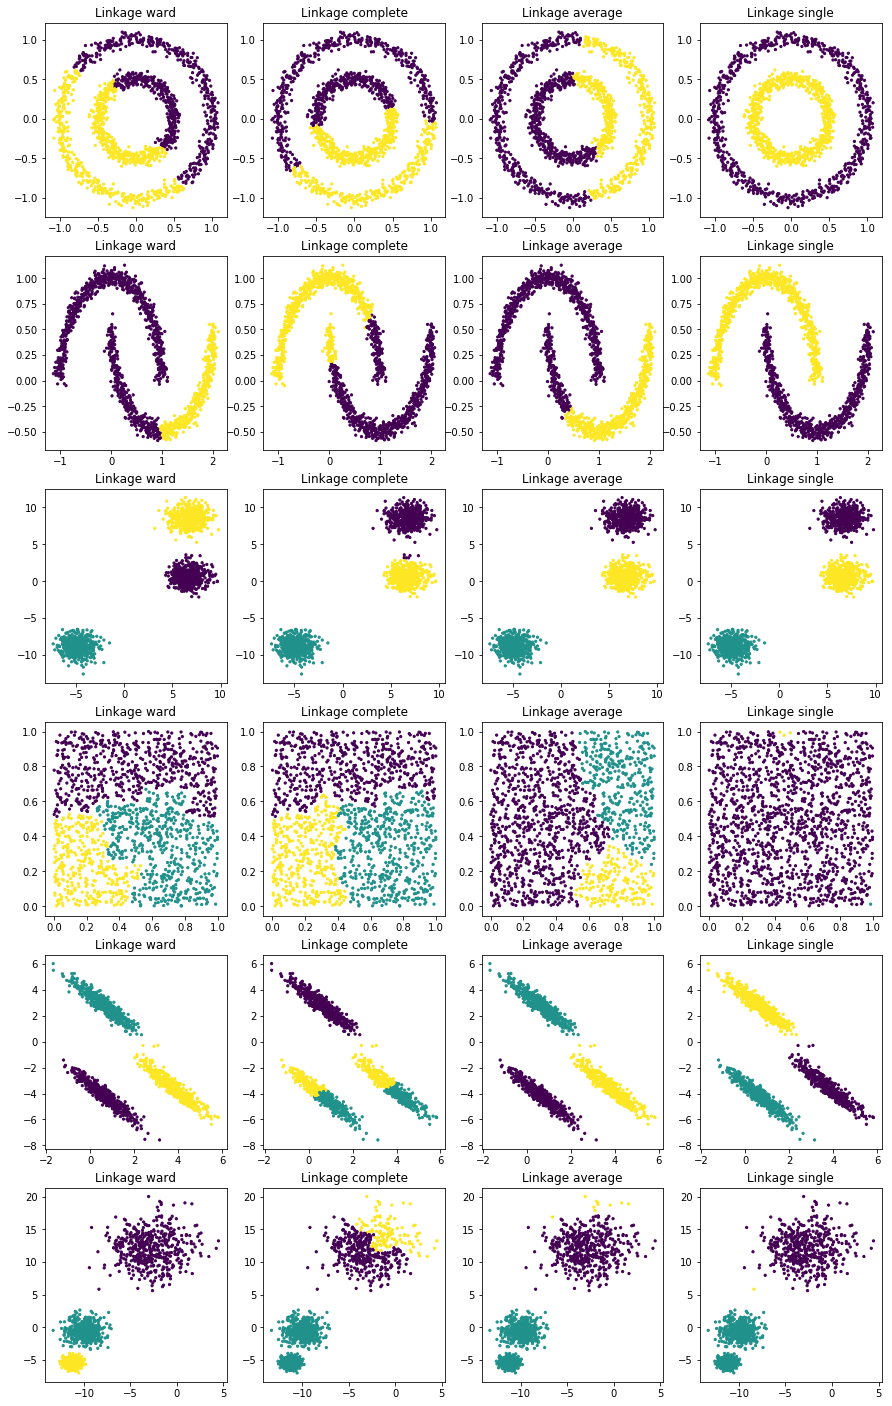

In [15]:
plt.figure(figsize = (15,25))
linkage = ["ward", 
           "complete", 
           "average", 
           "single"]

plot_num = 1
for j in enumerate(data):
    for s in enumerate(linkage):

        if np.logical_or([j[0] == 0],[j[0] == 1]):
            n=2
        else:
            n=3
        
        mod_hierarchical = AgglomerativeClustering(linkage = s[1],
                                                        n_clusters = n)
        mod_hierarchical.fit(j[1])
        
        
        plt.subplot(len(data), len(linkage), plot_num)
        plot_num += 1 
        plt.title("Linkage %s" %(s[1]))
        plt.scatter(j[1][:,0], j[1][:,1], c = mod_hierarchical.labels_,
                    s = 5)
plt.show()

<a id="DBSCAN"></a> <br>

# <div align="center">DBSCAN</div>
---------------------------------------------------------------------
[go to top](#top)

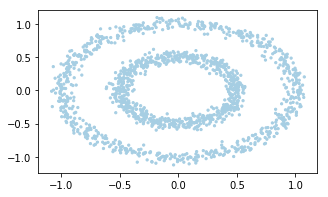

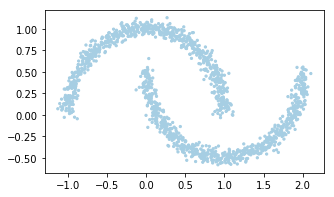

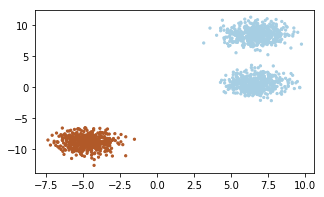

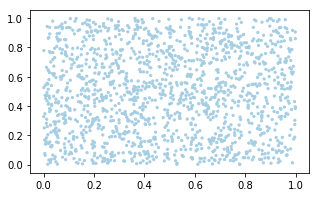

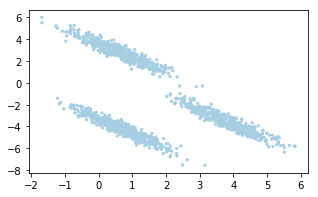

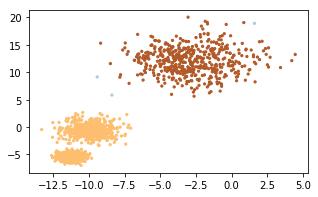

In [14]:
for j in enumerate(data):
    mod_dbscan = DBSCAN(eps = 2.5, min_samples = 25)
    mod_dbscan.fit(j[1])
    
    plt.figure(figsize = (5,3))
    plt.scatter(j[1][:,0], j[1][:,1], c = mod_dbscan.labels_,
                    s = 5, cmap = plt.cm.Paired)
    plt.show()

<a id="LocalOutlierFactor"></a> <br>

# <div align="center">Local Outlier Factor</div>
---------------------------------------------------------------------
[go to top](#top)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


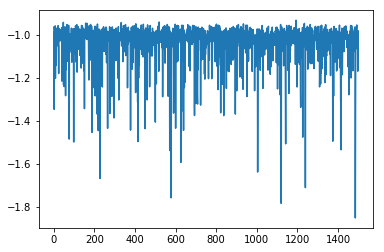

[ 1  1 -1 ... -1  1  1]
[0. 0. 0. ... 0. 0. 0.]


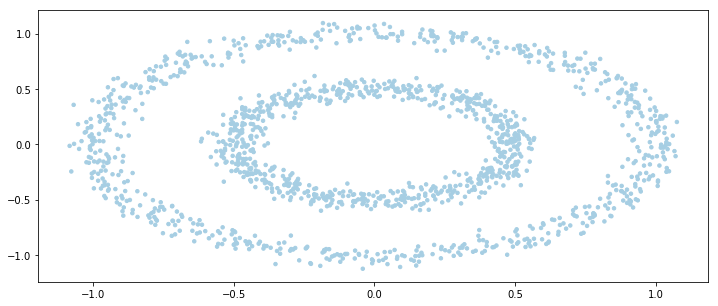

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


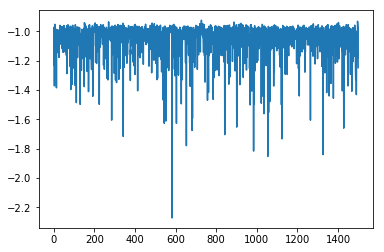

[-1  1  1 ...  1  1 -1]
[0. 0. 0. ... 0. 0. 0.]


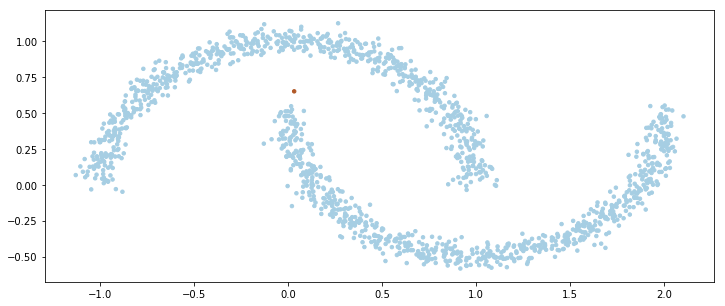

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


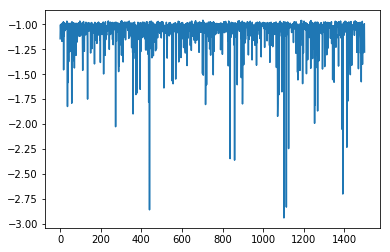

[ 1  1  1 ...  1  1 -1]
[0. 0. 0. ... 0. 0. 0.]


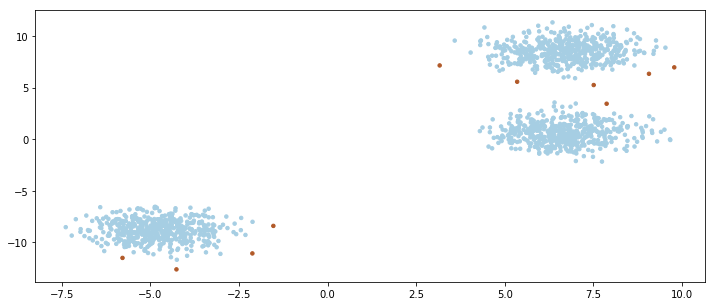

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


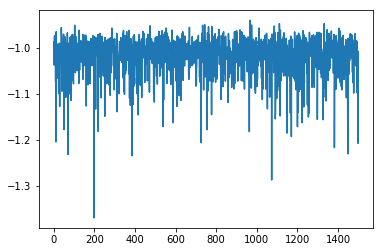

[ 1  1  1 ...  1 -1  1]
[0. 0. 0. ... 0. 0. 0.]


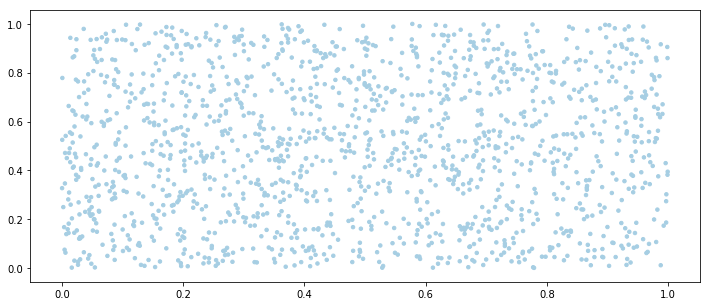

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


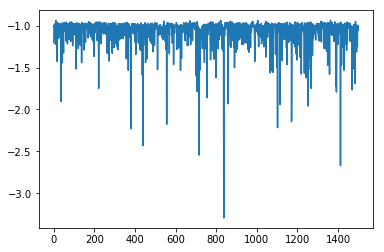

[1 1 1 ... 1 1 1]
[0. 0. 0. ... 0. 0. 0.]


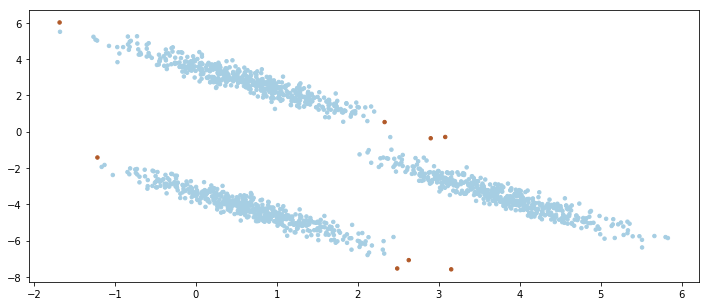

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


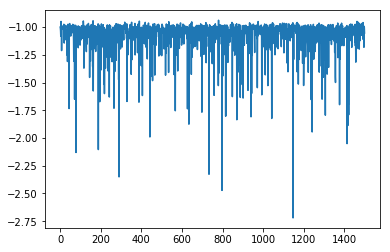

[1 1 1 ... 1 1 1]
[0. 0. 0. ... 0. 0. 0.]


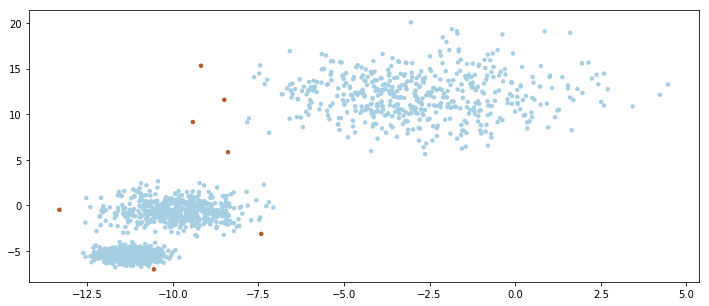

In [19]:
for j in enumerate(data):
        
    mod_lof = LocalOutlierFactor(n_neighbors = 15)
    y_predict = mod_lof.fit_predict(j[1])
    y_predict_new = mod_lof.negative_outlier_factor_
    plt.plot(y_predict_new)
    plt.show()
    ind_minus = (y_predict_new <= -2)
    ind_plus = (y_predict_new > -2)
    y_predict_new[ind_minus] = 1
    y_predict_new[ind_plus] = 0
    print(y_predict)
    print(y_predict_new)
    plt.figure(figsize = (12,5))
    plt.scatter(j[1][:,0], j[1][:,1], c = y_predict_new,
                    s = 12, cmap = plt.cm.Paired)
    plt.show()